In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

### Імпорт даних

In [4]:
df = pd.read_csv('Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Перевірка кількості порожніх значень

In [5]:
# df.replace("?", pd.NaT, inplace=True)
for column in df.columns:
    count = df[column].eq("?").sum()
    if count > 0: 
        print(f"{column}: {count}")

normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


### Заміна порожніх значень та перевірка типів даних

In [7]:
df=df[ df['price'] !='?']
columns_to_process = ['price', 'peak-rpm', 'horsepower', 'normalized-losses', 'bore', 'stroke']

for column in columns_to_process:
    df[column] = pd.to_numeric(df[column].replace('?', 0))

print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


### Коригування типів даних

In [8]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [18]:
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


### Формуємо окремий датасет для числових колонок

In [12]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


### Графік кореляції між числовими факторами

#### Розглянемо взаємозв'язки:
Ціна (price): Має значний взаємозв'язок з параметрами, такими як curb-weight (0.83), engine-size (0.87), horsepower (0.79), width (0.75), та length (0.69). Це може вказувати на те, що автомобілі з більшими та потужнішими двигунами частіше коштують більше.

Двигун (engine-size) та Потужність (horsepower):Є сильною позитивною кореляцією між engine-size та horsepower (0.79). Це логічно, оскільки більший об'єм двигуна часто пов'язаний з більшою потужністю.

Розміри автомобіля (length, width, height): Є взаємозв'язок між розмірами автомобіля. Наприклад, length та width мають сильну позитивну кореляцію (0.86), що може вказувати на те, що довші автомобілі частіше ширші.

Витрати пального (city-mpg та highway-mpg): Витрати пального в місті (city-mpg) та на трасі (highway-mpg) мають негативну кореляцію з ціною, що означає, що більш високі витрати пального зазвичай пов'язані з меншою ціною.

Ширина (width) та Висота (height): Мають слабкий взаємозв'язок між собою (0.31), що означає, що зазвичай вони не взаємозамінні.

Також можна зауважити дивовижні кореляції між symboling та height (-0.55), або між curb-weight та highway-mpg (-0.79), які можуть вимагати подальшого аналізу.

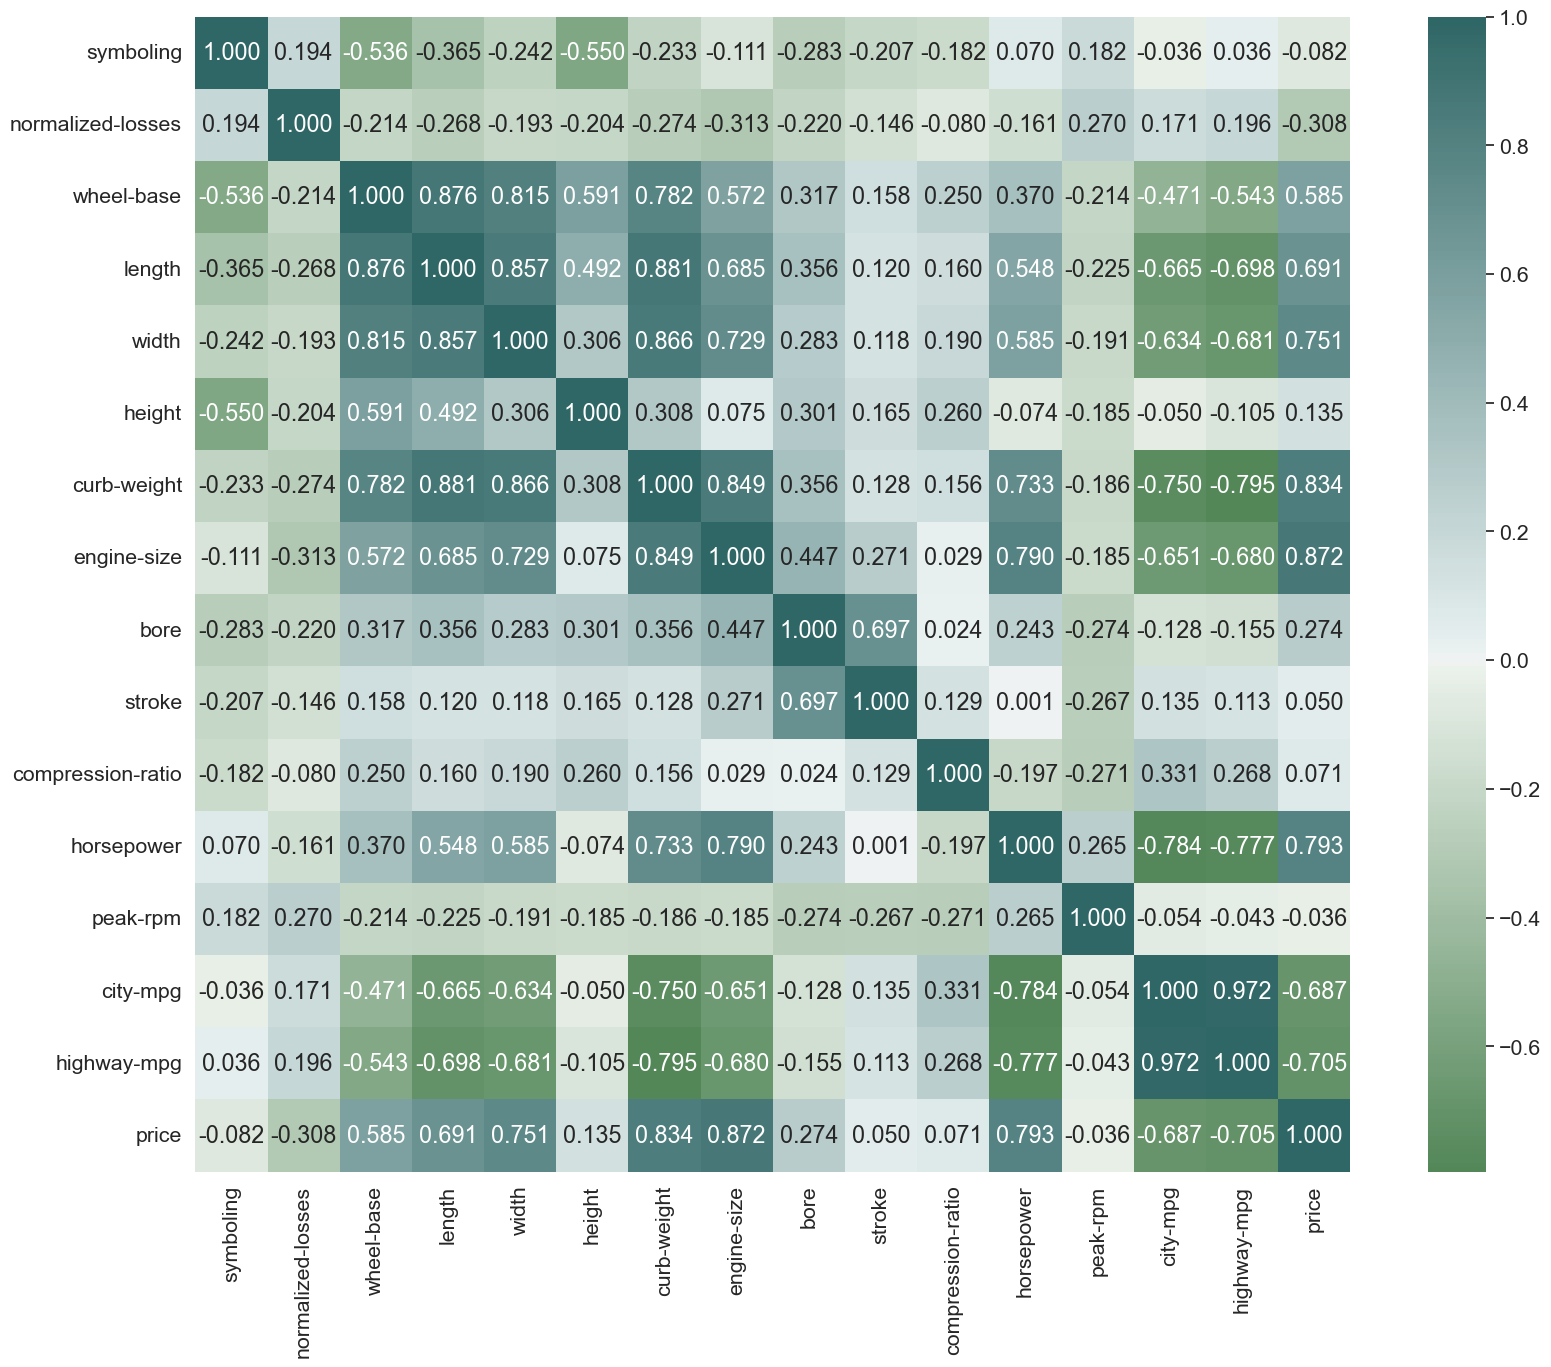

In [84]:
dataset2 = numeric_df.corr()
plt.figure(figsize=(20,15))

cmap = sns.diverging_palette(850, 190, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(dataset2, center=0, annot=True, fmt='.3f', square=True, cmap=cmap)

### Ціни на автомобілі
Можемо зробити висновок що найбільшу частоту мають автомобілі ціною від 5,000 до 10,000. Зі збільшенням ціни знижується кількість проданих авто. 

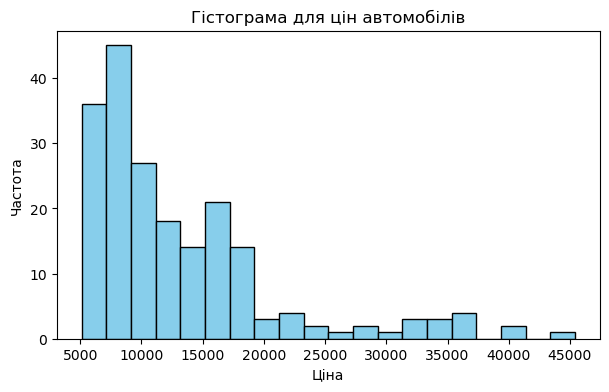

In [25]:
plt.figure(figsize=(7, 4))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гістограма для цін автомобілів')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

### Показник кінських сил
З графіку видно, що найбільше записів про автомобілі з показником кінських сил в діапазоні 70-120 к.с.
Бачимо вкид у вигляді нульового значення, яке варто видалити.

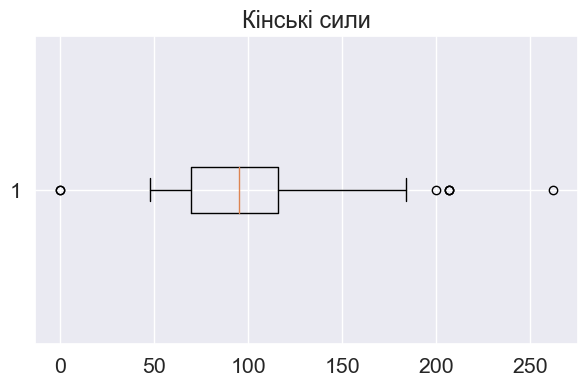

In [87]:
plt.figure(figsize=(7, 4))
plt.boxplot(df['horsepower'].dropna(), vert=False)
plt.title('Кінські сили')
# plt.xlabel('Кінські сили')
plt.show()
df=df[ df['horsepower'] !=0]

### Розсіювання між об\'ємом двигуна та кінськими силами
З графіку видно, що найбільше скупчення записів є про автомобілі з показником в 50-150 к.с. та об'ємом двигуна в 80-150 л.

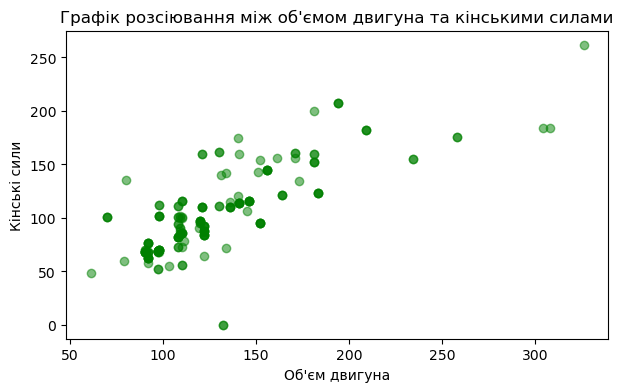

In [48]:
plt.figure(figsize=(7, 4))
plt.scatter(df['engine-size'], df['horsepower'], color='green', alpha=0.5)
plt.title('Графік розсіювання між об\'ємом двигуна та кінськими силами')
plt.xlabel('Об\'єм двигуна')
plt.ylabel('Кінські сили')
plt.show()

### Аналіз автомобільних марок
Можна відзначити, що найбільше автомобілей було зафіксовано торгової марки toyota. Після них за кількість йдуть автомобілі марки nissan, mazda. Найменш популярні - ато марки mercury, renault та isuzu.

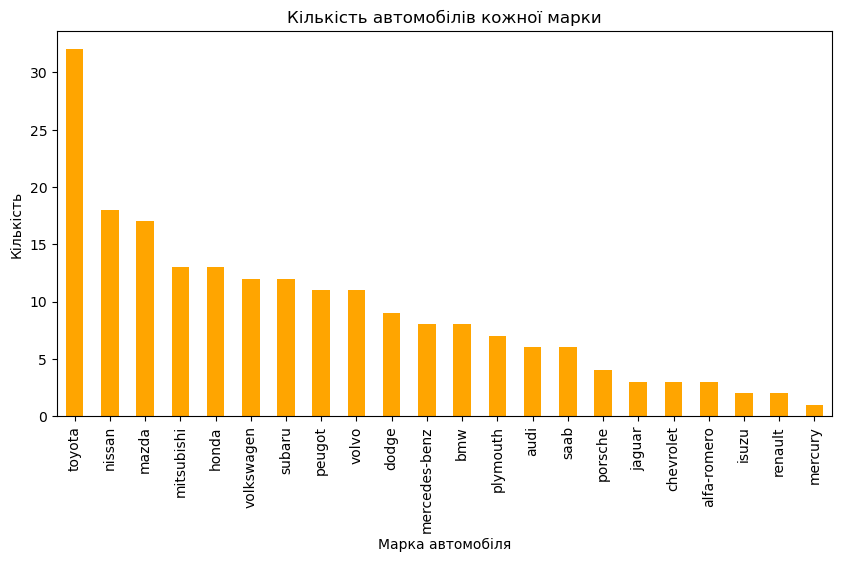

In [29]:
plt.figure(figsize=(10, 5))
df['make'].value_counts().plot(kind='bar', color='orange')
plt.title('Кількість автомобілів кожної марки')
plt.xlabel('Марка автомобіля')
plt.ylabel('Кількість')
plt.show()

### Тип палива
Переважна більшість (90%) зафіксованих автомобілей - на звичайному пальному, меншість (10%) - на дизельному пальному.

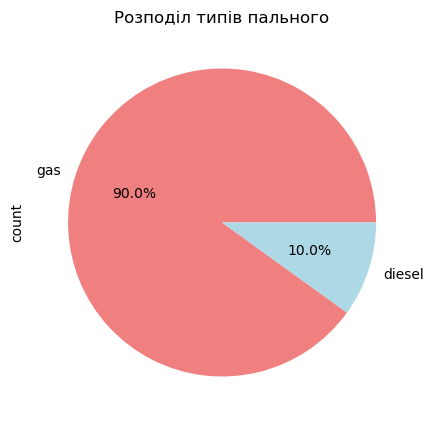

In [30]:
plt.figure(figsize=(5, 5))
df['fuel-type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Розподіл типів пального')
plt.show()

### Кількість циліндрів
Переважна більшість автомобілей мають чотири ціліндри.

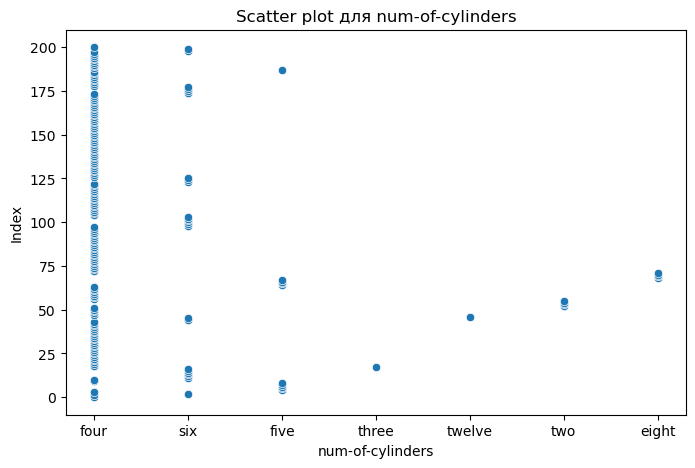

In [38]:
numeric_column = 'num-of-cylinders'  

# Побудова scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=numeric_column, y=range(len(df)), data=df)
plt.title(f'Scatter plot для {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Index')
plt.show()

### Об'єм двигуна та ціною
Можемо побачити залежність між між об'ємом двигуна та ціною - чим вищий об'єм двигуна, тим вище ціна, а отже є пряма залежність між цими факторами

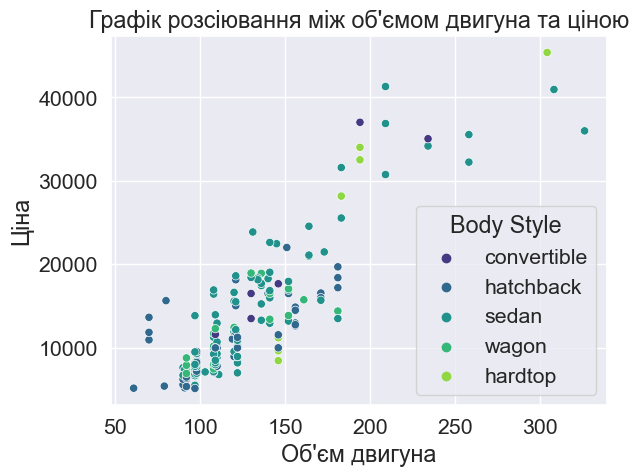

In [89]:
sns.scatterplot(x='engine-size', y='price', hue='body-style', data=df, palette='viridis', alpha=1)

plt.title('Графік розсіювання між об\'ємом двигуна та ціною')
plt.xlabel('Об\'єм двигуна')
plt.ylabel('Ціна')
plt.legend(title='Body Style')
plt.show()

In [77]:
from scipy.stats import pearsonr

X, y = (
    df.iloc[
        :, [0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25]
    ],
    df.price,
)

for idx in X.columns:
    pea_score, p_value = pearsonr(X[idx], y)
    print(
        f"The absolute value of the correlation between the {idx} feature and price is {round(np.abs(pea_score),2)},p-value is {round(p_value,3)}"
    )


def udf_pearsonr(X1, y1):
    result = [pearsonr(X1[column], y1)[0] for column in X1.columns]
    return result


sns.set(font_scale=1.4)

data = np.round(
    pd.DataFrame(
        X.apply(lambda column: udf_pearsonr(X, column)).values.tolist(),
        columns=X.columns,
        index=X.columns,
    ),
    1,
)

The absolute value of the correlation between the symboling feature and price is 0.08,p-value is 0.245
The absolute value of the correlation between the normalized-losses feature and price is 0.31,p-value is 0.0
The absolute value of the correlation between the wheel-base feature and price is 0.58,p-value is 0.0
The absolute value of the correlation between the length feature and price is 0.69,p-value is 0.0
The absolute value of the correlation between the width feature and price is 0.75,p-value is 0.0
The absolute value of the correlation between the height feature and price is 0.14,p-value is 0.055
The absolute value of the correlation between the curb-weight feature and price is 0.83,p-value is 0.0
The absolute value of the correlation between the engine-size feature and price is 0.87,p-value is 0.0
The absolute value of the correlation between the bore feature and price is 0.27,p-value is 0.0
The absolute value of the correlation between the stroke feature and price is 0.05,p-valu

Помічаємо слабкий позитивний зв'язок між symboling та ціною автомобіля. P-value показує, що цей зв'язок не є статистично значущим на рівні значущості 0.05. А також момірний позитивний зв'язок між втратами (normalized-losses) та ціною. P-value вказує на статистичну значущість цього зв'язку. Ознаки, такі як height, stroke, compression-ratio, peak-rpm мають слабкий або жодного позитивного зв'язку з ціною.

In [79]:
from sklearn.feature_selection import f_regression

for idx in X.columns:
    score, p_value = f_regression(X[idx].to_numpy().reshape(-1,1), y)
    print(f"The F-Score between the {idx} feature and price is {round(score[0],2)}, p-value is {round(p_value[0],3)}")

The F-Score between the symboling feature and price is 10.3, p-value is 0.002
The F-Score between the normalized-losses feature and price is 16.25, p-value is 0.0
The F-Score between the wheel-base feature and price is 80.29, p-value is 0.0
The F-Score between the length feature and price is 74.33, p-value is 0.0
The F-Score between the width feature and price is 88.06, p-value is 0.0
The F-Score between the height feature and price is 5.07, p-value is 0.025
The F-Score between the curb-weight feature and price is 191.33, p-value is 0.0
The F-Score between the engine-size feature and price is 180.01, p-value is 0.0
The F-Score between the bore feature and price is 56.15, p-value is 0.0
The F-Score between the stroke feature and price is 0.71, p-value is 0.402
The F-Score between the compression-ratio feature and price is 4.88, p-value is 0.028
The F-Score between the horsepower feature and price is 149.39, p-value is 0.0
The F-Score between the peak-rpm feature and price is 0.23, p-val

З цього можемо зробити висновок, що існує статистична різниця між середніми цінами для різних значень symboling а також між середніми цінами для різних значень normalized-losses та між середніми цінами для різних значень engine-size.

In [80]:
from sklearn.feature_selection import chi2

X = X > X.mean(0)

for idx in X.columns:
    score, p_value = chi2(X[idx].to_numpy().reshape(-1,1), y)
    print(f"The chi-square statistics between the {idx} feature and price is {round(score[0],2)}, p-value is {round(p_value[0],3)}")


The chi-square statistics between the symboling feature and price is 85.47, p-value is 1.0
The chi-square statistics between the normalized-losses feature and price is 83.47, p-value is 1.0
The chi-square statistics between the wheel-base feature and price is 119.46, p-value is 1.0
The chi-square statistics between the length feature and price is 108.9, p-value is 1.0
The chi-square statistics between the width feature and price is 113.64, p-value is 1.0
The chi-square statistics between the height feature and price is 91.18, p-value is 1.0
The chi-square statistics between the curb-weight feature and price is 117.77, p-value is 1.0
The chi-square statistics between the engine-size feature and price is 126.62, p-value is 1.0
The chi-square statistics between the bore feature and price is 85.47, p-value is 1.0
The chi-square statistics between the stroke feature and price is 73.76, p-value is 1.0
The chi-square statistics between the compression-ratio feature and price is 170.43, p-valu